In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import plot_tree

In [15]:
df = pd.read_excel('lophoc.xlsx', sheet_name='data')
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [16]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x

,Sức khỏe,Thời tiết
0,ốm,u ám
1,ốm,mưa
2,ốm,nắng
3,ốm,u ám
4,tốt,u ám
5,tốt,mưa
6,tốt,nắng


In [17]:
y

0    nghỉ 
1    nghỉ 
2    nghỉ 
3      học
4      học
5      học
6    nghỉ 
Name: Kết quả, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

encHealth = LabelEncoder()
x['Sức khỏe'] = encHealth.fit_transform(x['Sức khỏe'])
encWeather = LabelEncoder()
x['Thời tiết'] = encHealth.fit_transform(x['Thời tiết'])



C:\Users\ASUS\AppData\Local\Temp\ipykernel_6216\1626215225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sức khỏe'] = encHealth.fit_transform(x['Sức khỏe'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6216\1626215225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Thời tiết'] = encHealth.fit_transform(x['Thời tiết'])


In [19]:
x

,Sức khỏe,Thời tiết
0,1,2
1,1,0
2,1,1
3,1,2
4,0,2
5,0,0
6,0,1


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [21]:
x_train

,Sức khỏe,Thời tiết
4,0,2
6,0,1
5,0,0
2,1,1
1,1,0


In [22]:
y_train

4      học
6    nghỉ 
5      học
2    nghỉ 
1    nghỉ 
Name: Kết quả, dtype: object

In [23]:
modelDT =  DecisionTreeClassifier(criterion='entropy', max_depth=3)

modelDT=modelDT.fit(x_train, y_train)
modelDT.classes_

array(['học', 'nghỉ '], dtype=object)

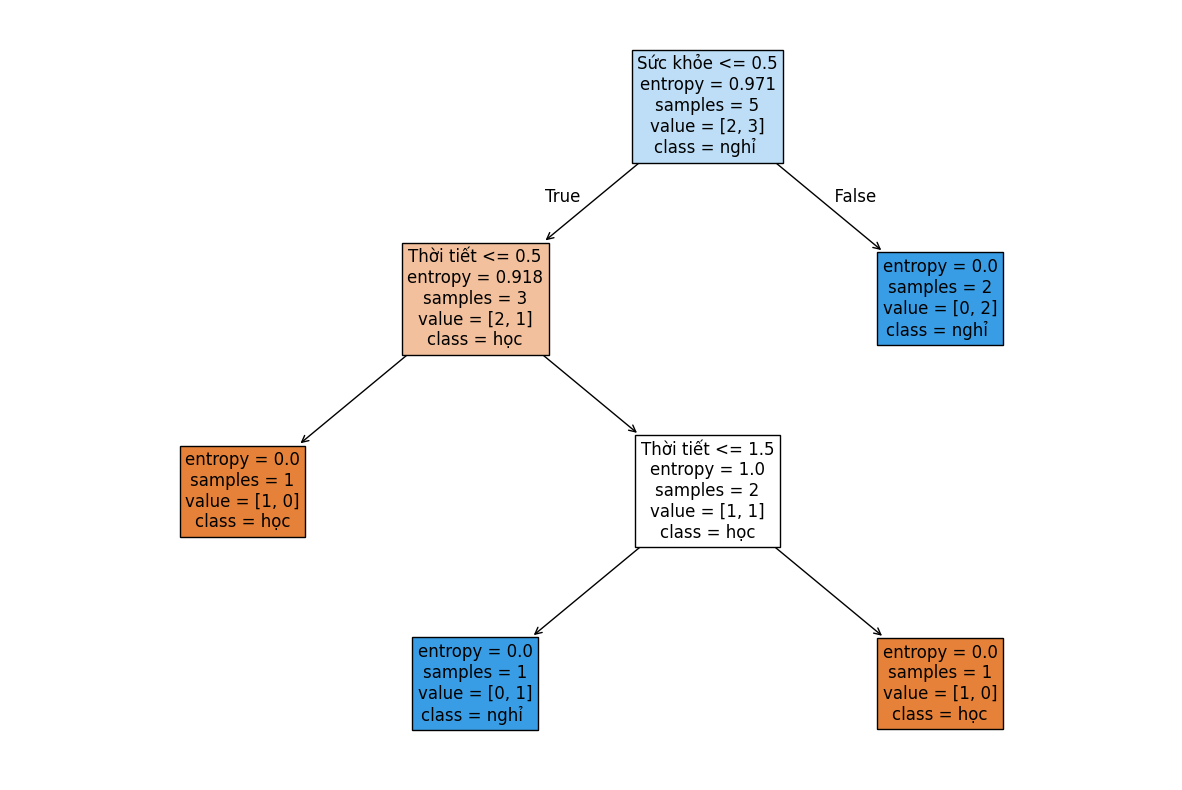

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
feature_cols = x_train.columns
plt.figure(figsize=(15,10))
plot_tree(modelDT, feature_names=feature_cols, class_names=modelDT.classes_, filled=True, fontsize=12)
plt.show()

tính TPR, FNR,FPR, TNR
sinh viên tự vẻ AUC & RPC
sinh viên tự tính Precision, Recall và FL

In [25]:
import numpy as np

# Giả sử encHealth và encWeather đã được fit trước đó với dữ liệu
health = 'ốm'
health_scaled = encHealth.transform([health])

weather = 'nắng'
weather_scaled = encWeather.transform([weather])

# Tạo mẫu đầu vào từ các đặc trưng đã mã hóa
feature_sample = np.array([health_scaled[0], weather_scaled[0]])

# Giả sử modelDT là mô hình Decision Tree đã được huấn luyện trước đó
y_sample_pred = modelDT.predict([feature_sample])

# In ra kết quả dự đoán
print(y_sample_pred)


ValueError: y contains previously unseen labels: 'ốm'